### Notebook to deploy trained random forest regression model to predict diatom carbon biomass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr

from sklearn.ensemble import RandomForestRegressor

# library for save and load scikit-learn models
import pickle

In [2]:
ls trained_models/

random_forest.pickle*         random_forest.pickle_histGB*
random_forest.pickle_chl_sst  random_forest.pickle_noLat*


In [3]:
# load pre-trained model - Chla and SST are model inputs; Diatom Carbon is model output (target)
filename = "trained_models/random_forest.pickle_chl_sst"

loaded_model = pickle.load(open(filename, "rb"))

In [4]:
#ds = xr.open_dataset('A20161372016144.L3m_8D_CHL_chlor_a_4km.nc') 

In [158]:
# satellite chl informtation
chl_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.CHL.chlor_a.4km.nc')

In [159]:
chl_ds

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

In [160]:
chl_ds = chl_ds.drop('palette')
chl_ds

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Data variables:
    chlor_a  (lat, lon) float32 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

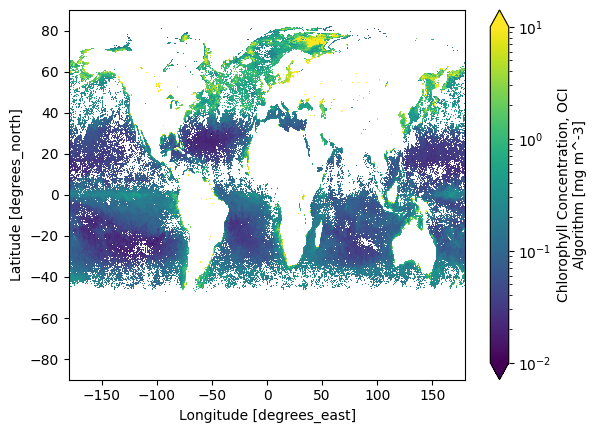

In [7]:
chl_ds.chlor_a.plot(x="lon",  norm=LogNorm(vmin=0.01, vmax=10));

In [8]:
# estimate diatom carbon biomass using a previous method
baseline_diats = 1.5*chl_ds.chlor_a**1.9  # Eq. from Chase et al. 2022

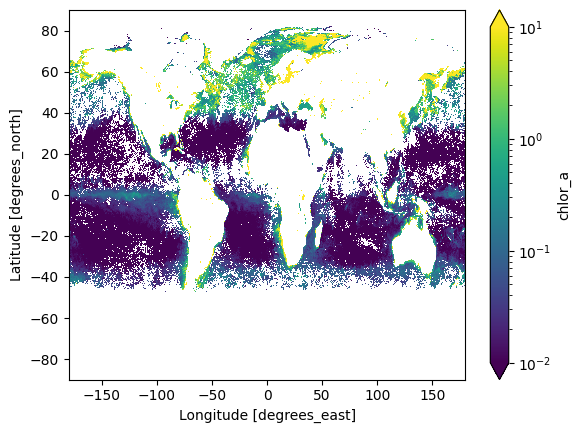

In [9]:
baseline_diats.plot(x="lon",  norm=LogNorm(vmin=0.01, vmax=10));

In [10]:
# load satellite SST data (do not use bbp for now)
sst_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.SST.sst.4km.nc')
#bbp_ds = xr.open_dataset('sat_data/AQUA_MODIS.20160516_20160523.L3m.8D.IOP.bbp_443.4km.nc')

In [11]:
sst_ds

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.SST...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   8-day
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        16908859
    data_minimum:                     -1.8
    data_maximum:                     39.985

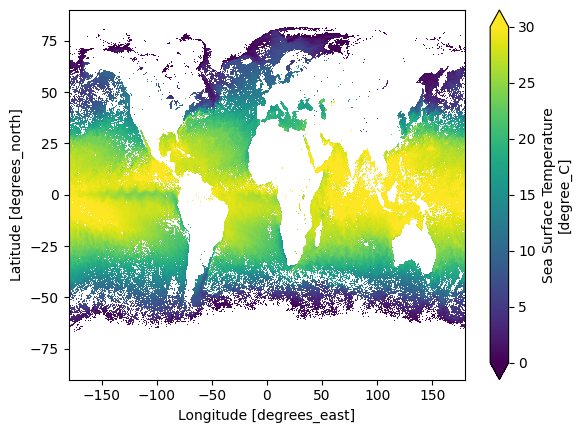

In [12]:
sst_ds.sst.plot(x="lon", vmin=0, vmax=30)

In [13]:
#bbp_ds

In [14]:
#bbp_ds.bbp_443.plot(x='lon', vmin=0, vmax=0.01)

In [162]:
# concatenate the two datasets of variables into one dataset
ds = xr.merge([chl_ds,sst_ds])  #,bbp_ds

In [163]:
ds

<xarray.Dataset>
Dimensions:   (lat: 6811, lon: 13674, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 -89.98 -89.98 -89.94 -89.9 ... 89.9 89.9 89.94 89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    sst       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual_sst  (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    palette   (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        12142689
    data_minimum:                     0.0024211504
    data_maximum:                     86.086975

In [17]:
# data_sst = ds['sst'].values  #,'chlor_a','bbp_443'
# # Reshape the 2D variable into a 2D NumPy array
# sst_reshaped = data_sst.reshape(-1, data_sst.shape[-1])

# data_chla = ds['chlor_a'].values  #,'chlor_a','bbp_443'
# # Reshape the 2D variable into a 2D NumPy array
# chla_reshaped = data_chla.reshape(-1, data_chla.shape[-1])

# data_bbp = ds['bbp_443'].values  #,'chlor_a','bbp_443'
# # Reshape the 2D variable into a 2D NumPy array
# bbp_reshaped = data_bbp.reshape(-1, data_bbp.shape[-1])

In [18]:
lats = abs(ds.lat.to_numpy())
sst = ds.sst.to_numpy()
chla = ds.chlor_a.to_numpy()
#bbp = ds.bbp_443.to_numpy()

In [167]:
sst = sst_ds.sst.to_numpy()
chla = chl_ds.chlor_a.to_numpy()

In [19]:
# repeat the latitude array so that it is the same size as the variable arrays
#lat = np.repeat(lats[np.newaxis], 13674)
#lat

In [168]:
#lat = lat.flatten()
sst = sst.flatten()
chla = chla.flatten()
#bbp = bbp.flatten()

In [169]:
sst.shape

(37324800,)

In [170]:
chla.shape

(37324800,)

In [171]:
inputs = np.stack((sst,chla), axis=0) #lat,,bbp

In [172]:
inputs.shape

(2, 37324800)

In [173]:
inputs = np.transpose(inputs)

In [174]:
inputs.shape

(37324800, 2)

In [175]:
df_inputs = pd.DataFrame(inputs)
# adding column name to the respective columns
df_inputs.columns =['t_avg', 'chla_avg']
df_inputs.describe()

,t_avg,chla_avg
count,1.690886e+07,1.214269e+07
mean,1.923678e+01,4.725682e-01
std,9.569515e+00,1.888570e+00
min,-1.800000e+00,2.421150e-03
25%,1.114000e+01,5.294751e-02
50%,2.212500e+01,1.030986e-01
75%,2.753500e+01,2.334667e-01
max,3.998500e+01,8.608698e+01


In [176]:
# Remove rows with NaN values and store them in a separate DataFrame
nan_rows = df_inputs[df_inputs.isna().any(axis=1)]
df_inputs = df_inputs.dropna()

In [177]:
nan_rows.describe()

,t_avg,chla_avg
count,4.896630e+06,130460.000000
mean,1.346529e+01,0.932246
std,1.029969e+01,3.766004
min,-1.800000e+00,0.006444
25%,4.585000e+00,0.091110
50%,1.032500e+01,0.171728
75%,2.466500e+01,0.472360
max,3.998500e+01,84.830292


In [178]:
# predict diatoms using the pre-trained sklearn RF model
pred = loaded_model.predict(df_inputs)

In [179]:
pred

array([1.78888983, 2.43901448, 2.43901448, ..., 2.16593918, 1.27301817,
       1.66007036])

In [180]:
# Add a column to the inputs dataframe with the index values
df_inputs['Index'] = df_inputs.index
df_inputs

,t_avg,chla_avg,Index
1741409,0.150,0.224196,1741409
1750040,0.300,0.334944,1750040
1750041,0.300,0.334944,1750041
1750042,0.150,0.334944,1750042
1750043,0.150,0.334944,1750043
...,...,...,...
28506328,6.580,0.412771,28506328
28506335,5.920,0.425517,28506335
28506336,6.725,0.425517,28506336
28506337,6.920,0.388678,28506337


In [181]:
pred = pd.DataFrame(pred)
pred.columns = ['diatC']
pred

,diatC
0,1.788890
1,2.439014
2,2.439014
3,1.813110
4,1.813110
...,...
12012224,2.452602
12012225,1.191609
12012226,2.165939
12012227,1.273018


In [182]:
pred.describe()

,diatC
count,1.201223e+07
mean,2.330698e+00
std,8.892145e+00
min,8.170563e-03
25%,5.510023e-02
50%,1.182009e-01
75%,6.893656e-01
max,1.879899e+02


In [208]:
pred

,diatC
0,1.788890
1,2.439014
2,2.439014
3,1.813110
4,1.813110
...,...
12012224,2.452602
12012225,1.191609
12012226,2.165939
12012227,1.273018


In [210]:
# re-assign the dataframe of predicted diatom index values to match the original input data
pred = pred.set_index(df_inputs['Index'])
pred

,diatC
Index,
1741409,1.788890
1750040,2.439014
1750041,2.439014
1750042,1.813110
1750043,1.813110
...,...
28506328,2.452602
28506335,1.191609
28506336,2.165939


In [211]:
# Add the removed NaN rows back to the DataFrame while preserving indices
df_pred = pd.concat([pred, nan_rows]).sort_index()
df_pred

,diatC,t_avg,chla_avg
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
37324795,NaN,NaN,NaN
37324796,NaN,NaN,NaN
37324797,NaN,NaN,NaN
37324798,NaN,NaN,NaN


In [212]:
# we only need the first column
df_pred.drop(['t_avg', 'chla_avg'], axis=1, inplace=True)
df_pred.describe()

,diatC
count,1.201223e+07
mean,2.330698e+00
std,8.892145e+00
min,8.170563e-03
25%,5.510023e-02
50%,1.182009e-01
75%,6.893656e-01
max,1.879899e+02


In [213]:
diat = df_pred.to_numpy()

In [214]:
diat.shape

(37324800, 1)

In [215]:
# re-shape to put back to 2D grid for map plotting
diat2D = np.reshape(diat, (4320, 8640))

In [216]:
diat2D.shape

(4320, 8640)

In [217]:
diatx = xr.DataArray(diat2D)

In [218]:
diatx

<xarray.DataArray (dim_0: 4320, dim_1: 8640)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: dim_0, dim_1

In [219]:
# copy attribute from chla variable to use the same lat/lon for diatoms
test = chl_ds.chlor_a.copy(data=diatx)

In [220]:
test = test.rename('diat')

In [221]:
test

<xarray.DataArray 'diat' (lat: 4320, lon: 8640)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

In [222]:
ds = sst_ds.assign(diat=test)

In [223]:
ds

<xarray.Dataset>
Dimensions:   (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon       (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...
    diat      (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20160516_20160523.L3m.8D.SST...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   8-day
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Optics >...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        16908859
    data_minimum:                     -1.8
    data_maximum:                     39.985

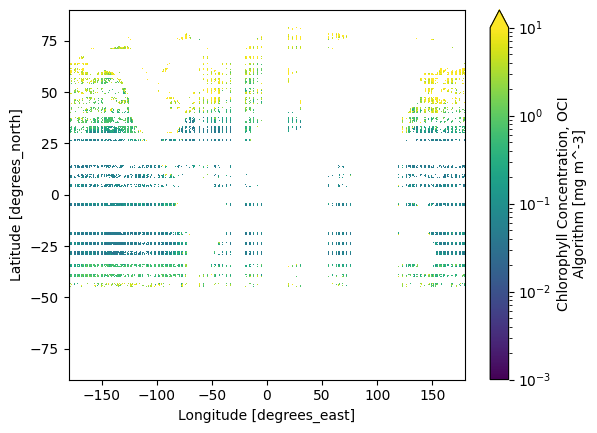

In [224]:
ds.diat.plot(x="lon",  norm=LogNorm(vmin=0.001, vmax=10))

In [ ]:
# use wrappers to combine sklearn and xarray
#from sklearn_xarray import wrap